# Introdução

Parabéns! Você é a mais nova cientista de dados da BlueToucan Medical, uma empresa multinacional da área de farmacos para o tratamento diversos tipos de câncer. Em reunião a direção da empresa solicitou que você fosse responsável por avaliar os dados da última pesquisa feita em parceira com os hospitais da Universidade de Wisconsin.

# Problema

Câncer de mama é o tipo de câncer mais comum entre as mulheres no mundo e no Brasil, depois do câncer de pele não melanoma. O câncer de mama responde, atualmente, por cerca de 28% dos casos novos de câncer em mulheres. O câncer de mama também acomete homens, porém é raro, representando menos de 1% do total de casos da doença. Estatísticas indicam aumento da sua incidência tanto nos países desenvolvidos quanto nos em desenvolvimento. Existem vários tipos de câncer de mama. Alguns evoluem de forma rápida, outros, não. A maioria dos casos tem bom prognóstico.

Os executivos da BlueToucan precisam de tomar algumas decisões ligadas a produção de um remédio para combater o câncer de mama. Por isso encomendaram uma análise de dados com você, sua missão é utilizar os dados coletados para extrair o máximo de informação possível sobre as características do câncer, dos indivíduos, onde moram e quais os fatores que aparentam ter relação com a grande quantidade de câncer de mama.

# Os dados

## breast_cancer_data.csv

> mean_radius: raio médio dos caroços retirados<br>
> mean_texture: textura média dos caroços retirados<br>
> mean_perimenter: perímetro médio dos caroços retirados<br>
> mean_area: área média dos caroços retirados<br>
> mean_smoothness: suavidade média dos caroços retirados<br>
> diagnosis: diagnóstico (1 - canceroso, 0 - não canceroso)<br>
> age: idade da paciente<br>
> name: nome da paciente<br>
> zipcode: código da cidade de residência da paciente<br>
> diabetes: paciente diagnosticado com diabetes (0 - sem diabetes, 1 - com diabetes<br>
> family_history: paciente com histórico familiar de câncer de mama<br>

## median_hh_income.csv

> COUNTY: nome da municipalidade<br>
> COUNT: mediana de renda anual<br>

## percentage_no_health_insurance.csv

> COUNTY: nome da municipalidade<br>
> COUNT: porcentagem da população sem plano de saúde<br>

## toxic_air_arsenic.csv

> COUNTY: nome da municipalidade<br>
> POUNDS: quantidade (em pounds) de arsênico liberado no ar.<br>

## wi_county_data.csv

> ZIP: código da cidade<br>
> COUNTY: nome da municipalidade<br>

## wi_regions.txt

> Documento de texto descrevendo regiões e suas respectivas municipalidades.

## WI (geojson)

> Pasta contendo geojson descrevendo o formato de todas as municipalidades.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = np.arange(36).reshape(6,6)
arr

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [3]:
df = pd.DataFrame(arr,columns=['idade','altura','tamanho do pe','salario','cor_do_olho','peso'],
                  index=['nasser','joao','marcelo','maria','joana','raquel'])

In [4]:
df

,idade,altura,tamanho do pe,salario,cor_do_olho,peso
nasser,0,1,2,3,4,5
joao,6,7,8,9,10,11
marcelo,12,13,14,15,16,17
maria,18,19,20,21,22,23
joana,24,25,26,27,28,29
raquel,30,31,32,33,34,35


In [5]:
df.loc['marcelo','salario']

15

In [6]:
arr2 = np.random.uniform(size=6)
arr2

array([0.5323358 , 0.10437373, 0.75480006, 0.18489483, 0.59554506,
       0.05596031])

In [7]:
pd.Series(arr2,index=['nasser','joao','marcelo','maria','joana','raquel'],name='salario_normalizado')

nasser     0.532336
joao       0.104374
marcelo    0.754800
maria      0.184895
joana      0.595545
raquel     0.055960
Name: salario_normalizado, dtype: float64

In [8]:
df['tamanho do pe']

nasser      2
joao        8
marcelo    14
maria      20
joana      26
raquel     32
Name: tamanho do pe, dtype: int64

In [9]:
df = pd.read_csv('../data/breast_cancer/breast_cancer_data.csv')
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
564,10.71,20.39,69.50,344.9,0.10820,1,50,3,Shannon James,53006,0,1
565,12.87,16.21,82.38,512.2,0.09425,1,41,1,Marie Christian,53007,0,1
566,13.59,21.84,87.16,561.0,0.07956,1,43,7,Tracy Morgan,53008,1,1
567,11.74,14.02,74.24,427.3,0.07813,1,48,3,Dawn Smith,53015,0,1
568,7.76,24.54,47.92,181.0,0.05263,1,54,6,Christine Nguyen,53013,0,1


In [10]:
mask = df.mean_radius < 11

In [11]:
df[df.mean_radius < 11].head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
158,10.95,21.35,71.90,371.1,0.12270,0,32,0,Shelia Henderson,53011,0,0
214,10.57,20.22,70.15,338.3,0.09073,1,43,4,Aimee Turner,53002,0,1
215,10.80,21.98,68.79,359.9,0.08801,1,43,1,Sophia Johnson,53001,1,0
222,10.48,14.98,67.49,333.6,0.09816,1,52,8,Ashley Wise,53014,0,1
229,10.03,NaN,63.19,307.3,0.08117,1,38,0,Brenda Jones,53016,1,1


In [12]:
df[(df.mean_radius < 11) | (df.diagnosis == 0)]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
0,17.990,10.38,122.80,1001.0,0.11840,0,33,1,Abigail Shaffer,53013,0,0
1,14.220,23.12,94.37,609.9,0.10750,0,25,7,Tiffany Miller,53007,0,0
2,12.340,26.86,81.15,477.4,0.10340,0,39,8,Anna Walker,53001,0,1
3,14.860,23.21,100.40,NaN,0.10440,0,30,5,Elizabeth Perkins,53006,0,1
4,13.770,22.29,90.63,588.9,0.12000,0,29,1,Erin Warner,53001,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
539,10.200,17.48,65.05,321.2,0.08054,1,48,2,Angela Smith,53014,0,1
544,10.600,18.95,NaN,346.4,0.09688,1,49,3,Mary Moore,53011,0,1
561,9.742,15.67,61.50,289.9,0.09037,1,41,6,Jessica Garcia,53005,0,1
564,10.710,20.39,69.50,344.9,0.10820,1,50,3,Shannon James,53006,0,1


In [13]:
df.shape

(569, 12)

In [14]:
df.zipcode.unique()

array([53013, 53007, 53001, 53006, 53008, 53016, 53011, 53003, 53005,
       53015, 53004, 53010, 53002, 53014, 53012])

In [15]:
"{}{}{}".format(5,22,45)

'52245'

In [16]:
x = 3

f"hoje eu tomei {x} litros de água"

'hoje eu tomei 3 litros de água'

In [17]:
df.query(" zipcode == 53013 & diagnosis == 1").mean_area.var()

14321.646397058823

In [18]:
for zipcode in df.zipcode.unique():
    print(zipcode,df.query(f" zipcode == {zipcode} & diagnosis == 1").mean_area.mean())

53013 489.45294117647063
53007 519.7
53001 431.847619047619
53006 443.0642857142857
53008 489.01000000000005
53016 474.27
53011 448.76562499999994
53003 493.86
53005 441.85
53015 426.22222222222223
53004 457.4222222222222
53010 479.4121951219512
53002 453.44444444444446
53014 417.178947368421
53012 477.825


In [19]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0


In [20]:
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
564,10.71,20.39,69.50,344.9,0.10820,1,50,3,Shannon James,53006,0,1
565,12.87,16.21,82.38,512.2,0.09425,1,41,1,Marie Christian,53007,0,1
566,13.59,21.84,87.16,561.0,0.07956,1,43,7,Tracy Morgan,53008,1,1
567,11.74,14.02,74.24,427.3,0.07813,1,48,3,Dawn Smith,53015,0,1
568,7.76,24.54,47.92,181.0,0.05263,1,54,6,Christine Nguyen,53013,0,1


In [21]:
df.sample(5,random_state=42,)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
204,14.42,19.77,94.48,642.5,0.09752,0,27,6,Sharon Cherry,53012,0,1
70,20.16,19.66,131.10,1274.0,0.08020,0,26,5,Kimberly Levine,53008,0,1
131,18.61,20.25,122.10,1094.0,0.09440,0,33,8,Michelle Maldonado,53005,0,1
431,13.49,22.30,86.91,561.0,0.08752,1,42,3,Maureen Lewis,53001,1,0
540,11.89,18.35,77.32,432.2,0.09363,1,46,7,Mary Moore,53012,1,1


In [22]:
df3 = pd.DataFrame(np.arange(25).reshape(5,5))

In [23]:
df3.sample(weights=[0.1,0.1,0.1,0.6,0.1])

,0,1,2,3,4
3,15,16,17,18,19


In [24]:
df.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
260,13.28,13.72,85.79,541.8,0.08363,1,28,2,Ashley Smith,53010,1,0
216,13.66,15.15,88.27,580.6,0.08268,1,36,7,Aimee Burgess,53006,0,0
399,10.08,15.11,63.76,317.5,0.09267,1,55,2,Sierra Sanchez,53002,1,1
169,16.74,21.59,110.10,869.5,0.09610,0,19,2,Erika Smith,53008,0,0
131,18.61,20.25,122.10,1094.0,0.09440,0,33,8,Michelle Maldonado,53005,0,1


## to_datetime

In [25]:
data = pd.date_range('2019-08-01','2020-08-01').values.astype(str)
data = pd.DataFrame(data)
data.columns = ['data_ref']
data['infected'] = np.random.randint(0,125,size=367)

In [26]:
data

,data_ref,infected
0,2019-08-01T00:00:00.000000000,60
1,2019-08-02T00:00:00.000000000,90
2,2019-08-03T00:00:00.000000000,54
3,2019-08-04T00:00:00.000000000,121
4,2019-08-05T00:00:00.000000000,27
...,...,...
362,2020-07-28T00:00:00.000000000,51
363,2020-07-29T00:00:00.000000000,65
364,2020-07-30T00:00:00.000000000,38
365,2020-07-31T00:00:00.000000000,80


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   data_ref  367 non-null    object
 1   infected  367 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [28]:
data['data_ref'] = pd.to_datetime(data['data_ref'])

In [29]:
data.head()

,data_ref,infected
0,2019-08-01,60
1,2019-08-02,90
2,2019-08-03,54
3,2019-08-04,121
4,2019-08-05,27


In [30]:
data['dia_da_semana'] = data['data_ref'].dt.dayofweek
data['semana_do_ano'] = data['data_ref'].dt.isocalendar().week
data['ano'] = data['data_ref'].dt.year

In [31]:
data['data_ref'].min()

Timestamp('2019-08-01 00:00:00')

In [32]:
data['data_ref'].max()

Timestamp('2020-08-01 00:00:00')

## Continuando

In [33]:
df.describe(percentiles=[.25, .5, .75])

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,zipcode,diabetes,family_history
count,554.000000,546.000000,548.000000,544.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.108717,19.295952,92.367792,652.674449,0.096360,0.627417,39.216169,3.769772,53008.444640,0.302285,0.479789
std,3.509903,4.289885,24.351585,349.628827,0.014064,0.483918,10.527664,2.578637,4.550674,0.459652,0.500031
min,6.981000,9.710000,47.920000,143.500000,0.052630,0.000000,15.000000,0.000000,53001.000000,0.000000,0.000000
25%,11.682500,16.210000,75.267500,419.525000,0.086370,0.000000,30.000000,1.000000,53005.000000,0.000000,0.000000
50%,13.375000,18.890000,86.735000,548.750000,0.095870,1.000000,41.000000,4.000000,53008.000000,0.000000,0.000000
75%,15.780000,21.807500,105.250000,784.150000,0.105300,1.000000,48.000000,6.000000,53012.000000,1.000000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000,58.000000,8.000000,53016.000000,1.000000,1.000000


In [34]:
df_vazio = pd.DataFrame([])

In [35]:
df_vazio['age_0'] = df.query("diagnosis == 0").age.describe()
df_vazio['age_1'] = df.query("diagnosis == 1").age.describe()

In [36]:
df_vazio

,age_0,age_1
count,212.000000,357.000000
mean,28.051887,45.845938
std,5.631003,6.303764
min,15.000000,28.000000
25%,24.000000,42.000000
50%,28.000000,46.000000
75%,32.000000,51.000000
max,41.000000,58.000000


In [37]:
ls = [1,2,2,2,2,2,2,2,2,40]

In [38]:
np.mean(ls)

5.7

In [39]:
np.median(ls)

2.0

## Correlação

In [40]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0


In [41]:
df[['mean_radius','mean_texture','mean_perimeter','mean_area','diagnosis']].corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,diagnosis
mean_radius,1.000000,0.324875,0.997812,0.987139,-0.733870
mean_texture,0.324875,1.000000,0.325693,0.316743,-0.416965
mean_perimeter,0.997812,0.325693,1.000000,0.986235,-0.742076
mean_area,0.987139,0.316743,0.986235,1.000000,-0.705188
diagnosis,-0.733870,-0.416965,-0.742076,-0.705188,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      554 non-null    float64
 1   mean_texture     546 non-null    float64
 2   mean_perimeter   548 non-null    float64
 3   mean_area        544 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
 6   age              569 non-null    int64  
 7   pregnancies      569 non-null    int64  
 8   name             569 non-null    object 
 9   zipcode          569 non-null    int64  
 10  diabetes         569 non-null    int64  
 11  family_history   569 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 53.5+ KB


In [43]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,zipcode,diabetes,family_history
mean_radius,1.000000,0.324875,0.997812,0.987139,0.165649,-0.733870,-0.584340,-0.050521,-0.035268,-0.210744,-0.275584
mean_texture,0.324875,1.000000,0.325693,0.316743,-0.016475,-0.416965,-0.335382,-0.058911,-0.034255,-0.125740,-0.221870
mean_perimeter,0.997812,0.325693,1.000000,0.986235,0.211912,-0.742076,-0.600677,-0.057125,-0.051525,-0.233816,-0.295255
mean_area,0.987139,0.316743,0.986235,1.000000,0.179204,-0.705188,-0.563556,-0.039865,-0.038528,-0.204727,-0.254880
mean_smoothness,0.165649,-0.016475,0.211912,0.179204,1.000000,-0.358560,-0.275720,-0.010013,-0.008287,-0.141273,-0.089996
diagnosis,-0.733870,-0.416965,-0.742076,-0.705188,-0.358560,1.000000,0.817927,0.025666,0.032190,0.333098,0.354445
age,-0.584340,-0.335382,-0.600677,-0.563556,-0.275720,0.817927,1.000000,0.010981,0.015152,0.303727,0.337449
pregnancies,-0.050521,-0.058911,-0.057125,-0.039865,-0.010013,0.025666,0.010981,1.000000,0.010389,-0.025846,0.054415
zipcode,-0.035268,-0.034255,-0.051525,-0.038528,-0.008287,0.032190,0.015152,0.010389,1.000000,0.056832,0.003569
diabetes,-0.210744,-0.125740,-0.233816,-0.204727,-0.141273,0.333098,0.303727,-0.025846,0.056832,1.000000,0.003648


In [44]:
df.skew()

mean_radius        0.898320
mean_texture       0.632336
mean_perimeter     0.994274
mean_area          1.677038
mean_smoothness    0.456324
diagnosis         -0.528461
age               -0.253929
pregnancies        0.077956
zipcode            0.002226
diabetes           0.863317
family_history     0.081124
dtype: float64

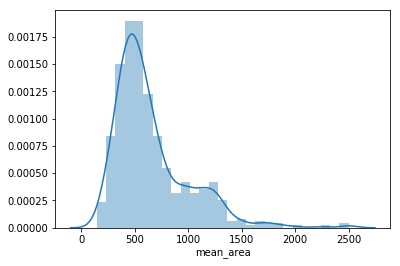

In [45]:
import seaborn as sns

sns.distplot(df['mean_area'])

In [46]:
df.age.mode()

0    47
dtype: int64

In [47]:
df.diagnosis.mode()

0    1
dtype: int64

In [48]:
df.zipcode.mode()

0    53010
dtype: int64

In [49]:
zip_codes = {}

for zipcode in df.zipcode:
    if zipcode in zip_codes.keys():
        zip_codes[zipcode] += 1
    else:
        zip_codes[zipcode] = 1

In [50]:
len(zip_codes.keys())

15

In [51]:
df.mean_smoothness.nunique()

474

In [52]:
df.zipcode.unique()

array([53013, 53007, 53001, 53006, 53008, 53016, 53011, 53003, 53005,
       53015, 53004, 53010, 53002, 53014, 53012])

In [53]:
ls = []

for zipcode in [53010,53002]:
    ls.append((zipcode,df[df.zipcode == zipcode].age.mean()))

In [54]:
## contando

round(df.family_history.value_counts(normalize=True) * 100,2)

0    52.02
1    47.98
Name: family_history, dtype: float64

In [55]:
df.diagnosis.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: diagnosis, dtype: float64

In [56]:
nomes = df.name.value_counts()[df.name.value_counts() == 2].index

df[df.name.isin(nomes)]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
106,15.32,17.27,103.20,713.3,0.13350,0,31,2,Kimberly Gibson,53011,0,0
185,21.56,22.39,142.00,1479.0,0.11100,0,21,2,Ashley Smith,53004,0,0
260,13.28,13.72,85.79,541.8,0.08363,1,28,2,Ashley Smith,53010,1,0
485,13.20,15.82,84.07,537.3,0.08511,1,57,5,Kimberly Gibson,53010,1,0
540,11.89,18.35,77.32,432.2,0.09363,1,46,7,Mary Moore,53012,1,1
544,10.60,18.95,NaN,346.4,0.09688,1,49,3,Mary Moore,53011,0,1


In [57]:
ls = df.mean_smoothness > df.mean_smoothness.mean()
df['acima'] = 1

for idx in df[ls].index:
    df.loc[idx,'acima'] = 'acima'

In [58]:
df.mean_smoothness.mean()

0.09636028119507908

In [59]:
def acima_media(value):
    
    media = df.mean_smoothness.mean()
    
    if value > media:
        return 'acima_media'
    else:
        return 'abaixo_media'

In [60]:
df.mean_smoothness.head()

0    0.1184
1    0.1075
2    0.1034
3    0.1044
4    0.1200
Name: mean_smoothness, dtype: float64

In [61]:
df['log_smoothness'] = df.mean_smoothness.apply(np.log)
df['sqrt_smoothness'] = df.mean_smoothness.apply(np.sqrt)

In [62]:
def split_name(value):
    nome = value.split()
    return nome[0]

def last_name(value):
    nome = value.split()
    return nome[1]

In [63]:
df['first_name'] = df.name.apply(split_name)
df['last_name'] = df.name.apply(last_name)

In [64]:
'nasser','boan'

('nasser', 'boan')

In [65]:
'nasser' + 'boan'

'nasserboan'

In [66]:
'nasser' + ' ' + 'boan'

'nasser boan'

In [67]:
df['nome_completo'] = df.first_name + ' ' + df.last_name

In [68]:
df['nova_coluna'] = df.mean_area / df.mean_radius

In [69]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,acima,log_smoothness,sqrt_smoothness,first_name,last_name,nome_completo,nova_coluna
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0,acima,-2.133687,0.344093,Abigail,Shaffer,Abigail Shaffer,55.642023
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0,acima,-2.230264,0.327872,Tiffany,Miller,Tiffany Miller,42.890295
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1,acima,-2.269150,0.321559,Anna,Walker,Anna Walker,38.687196
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1,acima,-2.259526,0.323110,Elizabeth,Perkins,Elizabeth Perkins,NaN
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0,acima,-2.120264,0.346410,Erin,Warner,Erin Warner,42.766885


In [70]:
df.describe().shape

(8, 14)

In [71]:
df.describe().transpose().shape

(14, 8)

In [72]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,acima,log_smoothness,sqrt_smoothness,first_name,last_name,nome_completo,nova_coluna
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0,acima,-2.133687,0.344093,Abigail,Shaffer,Abigail Shaffer,55.642023
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0,acima,-2.230264,0.327872,Tiffany,Miller,Tiffany Miller,42.890295
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1,acima,-2.269150,0.321559,Anna,Walker,Anna Walker,38.687196
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1,acima,-2.259526,0.323110,Elizabeth,Perkins,Elizabeth Perkins,NaN
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0,acima,-2.120264,0.346410,Erin,Warner,Erin Warner,42.766885


In [73]:
df[(df.zipcode == 53004)&(df.pregnancies == 4)].age.mean()

nan

In [74]:
df.pivot_table(index='diagnosis',columns='diabetes',values='age',aggfunc='count')

diabetes,0,1
diagnosis,,
0,190,22
1,207,150


In [75]:
150/172

0.872093023255814

In [76]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,acima,log_smoothness,sqrt_smoothness,first_name,last_name,nome_completo,nova_coluna
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0,acima,-2.133687,0.344093,Abigail,Shaffer,Abigail Shaffer,55.642023
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0,acima,-2.230264,0.327872,Tiffany,Miller,Tiffany Miller,42.890295
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1,acima,-2.269150,0.321559,Anna,Walker,Anna Walker,38.687196
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1,acima,-2.259526,0.323110,Elizabeth,Perkins,Elizabeth Perkins,NaN
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0,acima,-2.120264,0.346410,Erin,Warner,Erin Warner,42.766885


In [77]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,acima,log_smoothness,sqrt_smoothness,first_name,last_name,nome_completo,nova_coluna
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0,acima,-2.133687,0.344093,Abigail,Shaffer,Abigail Shaffer,55.642023
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0,acima,-2.230264,0.327872,Tiffany,Miller,Tiffany Miller,42.890295
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1,acima,-2.269150,0.321559,Anna,Walker,Anna Walker,38.687196
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1,acima,-2.259526,0.323110,Elizabeth,Perkins,Elizabeth Perkins,NaN
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0,acima,-2.120264,0.346410,Erin,Warner,Erin Warner,42.766885


In [78]:
df.pivot_table(index='zipcode',columns='diabetes',values='age',aggfunc='mean')

diabetes,0,1
zipcode,,
53001,38.115385,42.750000
53002,34.608696,44.100000
53003,37.444444,47.428571
53004,35.333333,44.727273
53005,36.360000,44.181818
53006,36.590909,43.444444
53007,37.111111,44.500000
53008,38.678571,42.294118
53010,39.085714,45.818182


In [79]:
df['mean_area'].nlargest(10)

21     2501.0
15     2499.0
59     2250.0
85     2010.0
137    1878.0
187    1841.0
203    1761.0
81     1747.0
51     1686.0
9      1685.0
Name: mean_area, dtype: float64

In [80]:
df.nlargest(10,columns='mean_area')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,acima,log_smoothness,sqrt_smoothness,first_name,last_name,nome_completo,nova_coluna
21,27.42,26.27,186.9,2501.0,0.10840,0,30,3,Jeanette Harrison,53004,0,0,acima,-2.221927,0.329242,Jeanette,Harrison,Jeanette Harrison,91.210795
15,28.11,18.47,188.5,2499.0,0.11420,0,30,8,Courtney Mills,53013,0,0,acima,-2.169804,0.337935,Courtney,Mills,Courtney Mills,88.900747
59,NaN,21.87,182.1,2250.0,0.10940,0,24,1,Miss Sandra Zimmerman,53003,0,0,acima,-2.212744,0.330757,Miss,Sandra,Miss Sandra,NaN
85,25.73,17.46,174.2,2010.0,0.11490,0,26,8,Nancy Cain,53002,0,1,acima,-2.163693,0.338969,Nancy,Cain,Nancy Cain,78.118927
137,25.22,24.91,171.5,1878.0,0.10630,0,29,3,Aimee Montoya,53014,0,0,acima,-2.241490,0.326037,Aimee,Montoya,Aimee Montoya,74.464711
187,24.63,21.60,165.5,1841.0,0.10300,0,27,0,Kristy Bryan,53007,0,0,acima,-2.273026,0.320936,Kristy,Bryan,Kristy Bryan,74.746244
203,24.25,NaN,166.2,1761.0,0.14470,0,29,1,Elizabeth Kelley,53001,0,1,acima,-1.933093,0.380395,Elizabeth,Kelley,Elizabeth Kelley,72.618557
81,23.51,24.27,155.1,1747.0,0.10690,0,22,4,Karen Morales,53012,0,0,acima,-2.235861,0.326956,Karen,Morales,Karen Morales,74.308805
51,23.27,22.04,152.1,1686.0,0.08439,0,29,1,Alicia Ryan,53014,0,1,1,-2.472306,0.290500,Alicia,Ryan,Alicia Ryan,72.453803
9,23.29,26.67,158.9,1685.0,0.11410,0,26,1,Crystal White,53016,0,0,acima,-2.170680,0.337787,Crystal,White,Crystal White,72.348647


In [81]:
df.mean_area.nsmallest(10)[0:2][:]

464    143.5
342    170.4
Name: mean_area, dtype: float64

In [82]:
df.iloc[1,3]

609.9

In [83]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,acima,log_smoothness,sqrt_smoothness,first_name,last_name,nome_completo,nova_coluna
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0,acima,-2.133687,0.344093,Abigail,Shaffer,Abigail Shaffer,55.642023
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0,acima,-2.230264,0.327872,Tiffany,Miller,Tiffany Miller,42.890295
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1,acima,-2.269150,0.321559,Anna,Walker,Anna Walker,38.687196
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1,acima,-2.259526,0.323110,Elizabeth,Perkins,Elizabeth Perkins,NaN
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0,acima,-2.120264,0.346410,Erin,Warner,Erin Warner,42.766885


In [84]:
df.sort_values(by=['diagnosis','age'],ascending=True)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,acima,log_smoothness,sqrt_smoothness,first_name,last_name,nome_completo,nova_coluna
73,15.49,19.97,102.40,744.7,0.11600,0,15,0,Robin Young,53014,1,0,acima,-2.154165,0.340588,Robin,Young,Robin Young,48.076178
93,19.00,18.91,123.40,1138.0,0.08217,0,15,2,Kaylee Schultz,53012,0,0,1,-2.498965,0.286653,Kaylee,Schultz,Kaylee Schultz,59.894737
58,16.25,19.51,109.80,815.8,0.10260,0,16,5,Lindsey Short,53015,1,0,acima,-2.276917,0.320312,Lindsey,Short,Lindsey Short,50.203077
141,19.02,24.59,122.00,1076.0,0.09029,0,17,5,Katherine Whitehead,53006,0,1,1,-2.404729,0.300483,Katherine,Whitehead,Katherine Whitehead,56.572029
142,13.28,20.28,87.32,545.2,0.10410,0,17,7,Emily Carney,53005,0,0,acima,-2.262403,0.322645,Emily,Carney,Emily Carney,41.054217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,12.06,12.74,76.84,448.6,0.09311,1,57,7,Lisa Johnson,53010,1,1,1,-2.373974,0.305139,Lisa,Johnson,Lisa Johnson,37.197347
461,12.36,21.80,79.78,466.1,0.08772,1,57,2,Anna Henderson,53010,1,0,1,-2.433605,0.296176,Anna,Henderson,Anna Henderson,37.710356
485,13.20,15.82,84.07,537.3,0.08511,1,57,5,Kimberly Gibson,53010,1,0,1,-2.463811,0.291736,Kimberly,Gibson,Kimberly Gibson,40.704545
390,10.90,12.96,68.69,366.8,0.07515,1,58,3,Kristy Johnson,53001,1,1,1,-2.588269,0.274135,Kristy,Johnson,Kristy Johnson,33.651376


In [85]:
df.mean_area.sort_values()

464    143.5
342    170.4
316    178.8
568    181.0
433    201.9
       ...  
486      NaN
490      NaN
507      NaN
524      NaN
547      NaN
Name: mean_area, Length: 569, dtype: float64

In [86]:
df_concat = pd.DataFrame([[1,2,3,4],[5,6,7,8]])

In [87]:
df_concat

,0,1,2,3
0,1,2,3,4
1,5,6,7,8


In [88]:
df_concat2 = pd.DataFrame([[9,10,11,12],[13,14,15,16]])

In [89]:
df_concat2

,0,1,2,3
0,9,10,11,12
1,13,14,15,16


In [90]:
df_concat_final = pd.concat([df_concat,df_concat2],ignore_index=True)

In [91]:
df_concat_final

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12
3,13,14,15,16


In [93]:
glp2016 = pd.read_csv('../data/glp/vendas-glp-municipio-2016.csv',
                      encoding='latin-1',sep=';')

In [94]:
glp2016.head()

,ANO,ESTADO,CÓDIGO IBGE,Município,Vendas
0,2016,Acre,1200013,ACRELANDIA,388451
1,2016,Acre,1200054,ASSIS BRASIL,184125
2,2016,Acre,1200104,BRASILEIA,517674
3,2016,Acre,1200138,BUJARI,261773
4,2016,Acre,1200179,CAPIXABA,218902


In [97]:
glp2017 = pd.read_csv('../data/glp/vendas-glp-municipio-2017.csv',
                      encoding='latin-1',sep=';')

In [98]:
glp2017

,ANO,ESTADO,CÓDIGO IBGE,Município,Vendas
0,2017,Acre,1200013,ACRELANDIA,509725
1,2017,Acre,1200054,ASSIS BRASIL,183271
2,2017,Acre,1200104,BRASILEIA,677594
3,2017,Acre,1200138,BUJARI,248714
4,2017,Acre,1200179,CAPIXABA,238747
...,...,...,...,...,...
4533,2017,Tocantins,1720903,TAGUATINGA,157582
4534,2017,Tocantins,1720978,TALISMA,20488
4535,2017,Tocantins,1721109,TOCANTINIA,62088
4536,2017,Tocantins,1721208,TOCANTINOPOLIS,599892


In [99]:
glp1617 = pd.concat([glp2016,glp2017])

In [101]:
lista_de_dataframes = []

for ano in range(8):
    df = pd.read_csv(f'../data/glp/vendas-glp-municipio-201{ano}.csv',
                      encoding='latin-1',sep=';')
    
    lista_de_dataframes.append(df)
    
    
dados_final = pd.concat(lista_de_dataframes)

In [102]:
data_plot = dados_final[dados_final['CÓDIGO IBGE'] == 1200013].Vendas.astype('int').values

In [103]:
import matplotlib.pyplot as plt

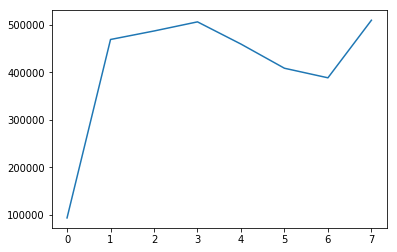

In [104]:
plt.plot(data_plot)

In [105]:
## leitura dos dataframes
df = pd.read_csv('../data/breast_cancer/breast_cancer_data.csv')
county_data = pd.read_csv('../data/breast_cancer/wi_county_data.csv')
toxic_air = pd.read_csv('../data/breast_cancer/toxic_air_arsenic.csv')

## alteração das colunas
toxic_air.columns = ['county','pounds']

## definição o dataframe final
df = df.merge(county_data,on='zipcode')
df = df.merge(toxic_air,on='county',how='left')

In [106]:
df.shape

(569, 14)

In [107]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,county,pounds
0,17.99,10.38,122.8,1001.0,0.11840,0,33,1,Abigail Shaffer,53013,0,0,Sheboygan,45.42
1,17.01,20.26,109.7,904.3,0.08772,0,27,6,Amber Everett,53013,0,1,Sheboygan,45.42
2,28.11,18.47,188.5,2499.0,0.11420,0,30,8,Courtney Mills,53013,0,0,Sheboygan,45.42
3,18.45,21.91,120.2,1075.0,0.09430,0,40,5,Nicole Carrillo,53013,1,0,Sheboygan,45.42
4,15.13,29.81,NaN,719.5,0.08320,0,33,8,Meghan Mitchell,53013,0,1,Sheboygan,45.42


In [108]:
df[['pounds','diagnosis']].corr()

,pounds,diagnosis
pounds,1.000000,-0.039129
diagnosis,-0.039129,1.000000


In [109]:
df.county.unique()

array(['Sheboygan', 'Waukesha', 'Dodge', 'Manitowoc', 'Ozaukee',
       'Fond Du Lac', 'Washington', 'Calumet'], dtype=object)

In [110]:
df.zipcode.unique()

array([53013, 53007, 53001, 53006, 53008, 53016, 53011, 53003, 53005,
       53015, 53004, 53010, 53002, 53014, 53012])

In [111]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,county,pounds
0,17.99,10.38,122.8,1001.0,0.11840,0,33,1,Abigail Shaffer,53013,0,0,Sheboygan,45.42
1,17.01,20.26,109.7,904.3,0.08772,0,27,6,Amber Everett,53013,0,1,Sheboygan,45.42
2,28.11,18.47,188.5,2499.0,0.11420,0,30,8,Courtney Mills,53013,0,0,Sheboygan,45.42
3,18.45,21.91,120.2,1075.0,0.09430,0,40,5,Nicole Carrillo,53013,1,0,Sheboygan,45.42
4,15.13,29.81,NaN,719.5,0.08320,0,33,8,Meghan Mitchell,53013,0,1,Sheboygan,45.42


In [112]:
df.pounds.isna().sum()

57

In [113]:
df.isna().sum()

mean_radius        15
mean_texture       23
mean_perimeter     21
mean_area          25
mean_smoothness     0
diagnosis           0
age                 0
pregnancies         0
name                0
zipcode             0
diabetes            0
family_history      0
county              0
pounds             57
dtype: int64

In [114]:
df[df.mean_radius.isna()]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,county,pounds
27,NaN,19.02,77.88,464.4,0.08313,1,51,2,Kelly Reese,53013,0,0,Sheboygan,45.42
50,NaN,NaN,80.62,492.9,0.08583,1,47,4,Rebecca Bryant,53007,1,1,Waukesha,4.41
57,NaN,18.07,79.42,491.9,0.07436,1,42,8,Renee Bruce,53007,0,0,Waukesha,4.41
72,NaN,26.29,129.10,1132.0,0.12150,0,26,3,Mary Mcmillan,53001,0,0,Sheboygan,45.42
110,NaN,18.80,109.30,886.3,0.08865,0,35,3,Brittany Martinez,53006,0,0,Dodge,76.22
129,NaN,16.83,70.92,373.2,0.10770,1,55,0,Jacqueline Campbell,53006,0,1,Dodge,76.22
149,NaN,14.76,84.74,551.7,0.07355,1,36,0,Sonya Mckee,53006,0,0,Dodge,76.22
235,NaN,23.81,92.87,610.7,0.09463,0,24,5,Elizabeth Oliver DDS,53011,0,0,Sheboygan,45.42
238,NaN,20.71,106.90,813.7,0.11690,0,32,8,Erin Hernandez,53011,0,0,Sheboygan,45.42
248,NaN,24.04,83.97,475.9,0.11860,0,32,7,Diana Reid,53011,0,0,Sheboygan,45.42


In [115]:
df[df.mean_radius.notna()]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,county,pounds
0,17.990,10.38,122.80,1001.0,0.11840,0,33,1,Abigail Shaffer,53013,0,0,Sheboygan,45.42
1,17.010,20.26,109.70,904.3,0.08772,0,27,6,Amber Everett,53013,0,1,Sheboygan,45.42
2,28.110,18.47,188.50,2499.0,0.11420,0,30,8,Courtney Mills,53013,0,0,Sheboygan,45.42
3,18.450,21.91,120.20,1075.0,0.09430,0,40,5,Nicole Carrillo,53013,1,0,Sheboygan,45.42
4,15.130,29.81,NaN,719.5,0.08320,0,33,8,Meghan Mitchell,53013,0,1,Sheboygan,45.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.640,16.34,87.21,571.8,0.07685,1,55,3,Rachel Aguirre,53012,1,0,Ozaukee,0.92
565,12.980,19.35,84.52,NaN,0.09579,1,47,4,Mary Johnson,53012,0,1,Ozaukee,0.92
566,9.567,15.91,60.21,279.6,0.08464,1,41,1,Anna Bailey,53012,0,0,Ozaukee,0.92
567,11.890,18.35,77.32,432.2,0.09363,1,46,7,Mary Moore,53012,1,1,Ozaukee,0.92


In [116]:
df.notna().sum()

mean_radius        554
mean_texture       546
mean_perimeter     548
mean_area          544
mean_smoothness    569
diagnosis          569
age                569
pregnancies        569
name               569
zipcode            569
diabetes           569
family_history     569
county             569
pounds             512
dtype: int64

In [117]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,county,pounds
0,17.99,10.38,122.8,1001.0,0.11840,0,33,1,Abigail Shaffer,53013,0,0,Sheboygan,45.42
1,17.01,20.26,109.7,904.3,0.08772,0,27,6,Amber Everett,53013,0,1,Sheboygan,45.42
2,28.11,18.47,188.5,2499.0,0.11420,0,30,8,Courtney Mills,53013,0,0,Sheboygan,45.42
3,18.45,21.91,120.2,1075.0,0.09430,0,40,5,Nicole Carrillo,53013,1,0,Sheboygan,45.42
4,15.13,29.81,NaN,719.5,0.08320,0,33,8,Meghan Mitchell,53013,0,1,Sheboygan,45.42


In [124]:
round((df.isna().sum() / df.shape[0])*100,2)

mean_radius         2.64
mean_texture        4.04
mean_perimeter      3.69
mean_area           4.39
mean_smoothness     0.00
diagnosis           0.00
age                 0.00
pregnancies         0.00
name                0.00
zipcode             0.00
diabetes            0.00
family_history      0.00
county              0.00
pounds             10.02
dtype: float64

In [119]:
df.shape

(569, 14)

In [121]:
(15 / 569)*100

2.6362038664323375

In [127]:
df[df.mean_texture.isna()]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,county,pounds
50,NaN,NaN,80.62,492.9,0.08583,1,47,4,Rebecca Bryant,53007,1,1,Waukesha,4.41
58,14.420,NaN,94.15,641.2,0.09751,1,40,0,Katherine Browning,53007,1,0,Waukesha,4.41
77,15.780,NaN,103.60,781.0,0.09710,0,38,5,Taylor Wong,53001,0,0,Sheboygan,45.42
78,24.250,NaN,166.20,1761.0,0.14470,0,29,1,Elizabeth Kelley,53001,0,1,Sheboygan,45.42
82,12.220,NaN,79.47,NaN,0.10960,1,35,4,Lisa Miller,53001,1,0,Sheboygan,45.42
87,8.671,NaN,54.42,227.2,0.09138,1,55,2,Patricia Jefferson,53001,1,1,Sheboygan,45.42
101,13.590,NaN,86.24,572.3,0.07948,1,55,6,Carolyn Miller,53001,1,0,Sheboygan,45.42
106,17.080,NaN,111.20,930.9,0.09898,0,25,2,Katie Mcneil,53006,0,0,Dodge,76.22
116,17.750,NaN,117.30,981.6,0.09997,0,33,2,Alyssa Galvan,53006,0,0,Dodge,76.22
148,12.180,NaN,77.79,NaN,0.10450,1,36,5,Christine Wright,53006,1,0,Dodge,76.22


In [132]:
media_texture = df.mean_texture.mean()
media_texture

19.295952380952382

In [135]:
df.mean_texture.fillna(media_texture,inplace=True)

In [136]:
df.mean_texture.isna().sum()

0

In [140]:
media_raio = df.mean_radius.mean()

type(df.mean_radius.fillna(media_raio))

pandas.core.series.Series

In [139]:
df.mean_radius.isna().sum()

15

In [141]:
type(df.mean_radius.fillna(media_raio,inplace=True))

NoneType

In [142]:
df.mean_radius.isna().sum()

0

In [ ]:
df.diabetes

In [143]:
%time
df.mean_perimeter.fillna(df.mean_perimeter.mean())

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


0      122.800000
1      109.700000
2      188.500000
3      120.200000
4       92.367792
          ...    
564     87.210000
565     84.520000
566     60.210000
567     77.320000
568     88.990000
Name: mean_perimeter, Length: 569, dtype: float64

In [144]:
%time
df.mean_perimeter.fillna(df.mean_perimeter.mean(),inplace=True)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [147]:
## inputação respeitando a distribuição de frequência

df.diabetes.value_counts(normalize=True)

0    0.697715
1    0.302285
Name: diabetes, dtype: float64

In [152]:
np.random.choice([0,1],p=df.diabetes.value_counts(normalize=True).values,size=50)

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1])

In [153]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,county,pounds
0,17.99,10.38,122.800000,1001.0,0.11840,0,33,1,Abigail Shaffer,53013,0,0,Sheboygan,45.42
1,17.01,20.26,109.700000,904.3,0.08772,0,27,6,Amber Everett,53013,0,1,Sheboygan,45.42
2,28.11,18.47,188.500000,2499.0,0.11420,0,30,8,Courtney Mills,53013,0,0,Sheboygan,45.42
3,18.45,21.91,120.200000,1075.0,0.09430,0,40,5,Nicole Carrillo,53013,1,0,Sheboygan,45.42
4,15.13,29.81,92.367792,719.5,0.08320,0,33,8,Meghan Mitchell,53013,0,1,Sheboygan,45.42


In [172]:
df.county.replace({'Sheboygan':'Sheboy_gan', 'Ozaukee':'Ozaukee_123'},inplace=True)

In [173]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,county,pounds
0,17.99,10.38,122.800000,1001.0,0.11840,0,33,1,Abigail Shaffer,53013,0,0,Sheboy_gan,45.42
1,17.01,20.26,109.700000,904.3,0.08772,0,27,6,Amber Everett,53013,0,1,Sheboy_gan,45.42
2,28.11,18.47,188.500000,2499.0,0.11420,0,30,8,Courtney Mills,53013,0,0,Sheboy_gan,45.42
3,18.45,21.91,120.200000,1075.0,0.09430,0,40,5,Nicole Carrillo,53013,1,0,Sheboy_gan,45.42
4,15.13,29.81,92.367792,719.5,0.08320,0,33,8,Meghan Mitchell,53013,0,1,Sheboy_gan,45.42


In [174]:
df.county

0       Sheboy_gan
1       Sheboy_gan
2       Sheboy_gan
3       Sheboy_gan
4       Sheboy_gan
          ...     
564    Ozaukee_123
565    Ozaukee_123
566    Ozaukee_123
567    Ozaukee_123
568    Ozaukee_123
Name: county, Length: 569, dtype: object

In [176]:
df.mean_texture.replace(to_replace=20.26,value=21.26,inplace=True)

In [181]:
df.name.str.lower().replace({'abigail shaffer','nasser_boan'})

0      abigail shaffer
1        amber everett
2       courtney mills
3      nicole carrillo
4      meghan mitchell
            ...       
564     rachel aguirre
565       mary johnson
566        anna bailey
567         mary moore
568         lisa allen
Name: name, Length: 569, dtype: object

In [204]:
df = pd.read_csv('../data/breast_cancer/breast_cancer_data.csv')

In [207]:
df[(df.mean_radius.isna())&(df.mean_texture.isna())]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
317,NaN,NaN,80.62,492.9,0.08583,1,47,4,Rebecca Bryant,53007,1,1


In [194]:
df.shape

(569, 12)

In [195]:
df.dropna(inplace=True)

In [189]:
df.isna().sum().sum()

0

In [190]:
df.shape

(490, 12)

In [191]:
569 - 490

79

In [196]:
df = pd.read_csv('../data/breast_cancer/breast_cancer_data.csv')

In [197]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0


In [ ]:
df.dropna()

In [198]:
df.isna().sum()

mean_radius        15
mean_texture       23
mean_perimeter     21
mean_area          25
mean_smoothness     0
diagnosis           0
age                 0
pregnancies         0
name                0
zipcode             0
diabetes            0
family_history      0
dtype: int64

In [201]:
df.dropna(subset=['mean_radius','mean_texture']).isna().sum()

mean_radius         0
mean_texture        0
mean_perimeter     21
mean_area          21
mean_smoothness     0
diagnosis           0
age                 0
pregnancies         0
name                0
zipcode             0
diabetes            0
family_history      0
dtype: int64

In [203]:
ls = ['mean_radius','mean_texture']

for feature in ls:
    df[feature].fillna(1,inplace=True)

In [210]:
df = pd.read_csv('../data/breast_cancer/breast_cancer_data.csv')

In [211]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0


In [221]:
df[['mean_area','zipcode','name']].groupby('zipcode').agg({'mean_area':'mean','name':'count'})

,mean_area,name
zipcode,,
53001,645.368571,38
53002,696.253125,33
53003,730.247059,34
53004,702.492857,29
53005,624.344118,36
53006,642.632000,53
53007,747.966667,31
53008,647.602326,45
53010,601.775000,57


In [228]:
df[['diagnosis','mean_area','age']].groupby('diagnosis').mean()

,mean_area,age
diagnosis,,
0,973.190594,28.051887
1,463.363743,45.845938


In [239]:
def above_age(value):
    if value > 40:
        return 'acima'
    else:
        return 'abaixo'
    

In [240]:
df['above_age'] = df.age.apply(above_age)

In [241]:
df[['diagnosis','above_age','mean_area']].groupby(['diagnosis','above_age']).mean()

mean_area
diagnosis above_age             
0         abaixo      972.574500
          acima      1034.800000
1         abaixo      480.531746
          acima       459.487097

In [247]:
df[df.duplicated(subset=['name'],keep='first')]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,above_age
260,13.28,13.72,85.79,541.8,0.08363,1,28,2,Ashley Smith,53010,1,0,abaixo
485,13.20,15.82,84.07,537.3,0.08511,1,57,5,Kimberly Gibson,53010,1,0,acima
544,10.60,18.95,NaN,346.4,0.09688,1,49,3,Mary Moore,53011,0,1,acima


In [251]:
df.drop_duplicates(subset=['name'],inplace=True)

In [252]:
df.shape

(566, 13)

In [253]:
df['nova_coluna'] = 1

In [254]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,above_age,nova_coluna
0,17.99,10.38,122.80,1001.0,0.1184,0,33,1,Abigail Shaffer,53013,0,0,abaixo,1
1,14.22,23.12,94.37,609.9,0.1075,0,25,7,Tiffany Miller,53007,0,0,abaixo,1
2,12.34,26.86,81.15,477.4,0.1034,0,39,8,Anna Walker,53001,0,1,abaixo,1
3,14.86,23.21,100.40,NaN,0.1044,0,30,5,Elizabeth Perkins,53006,0,1,abaixo,1
4,13.77,22.29,90.63,588.9,0.1200,0,29,1,Erin Warner,53001,0,0,abaixo,1


In [256]:
df.assign(nova_coluna = lambda x: x.age+10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,age,pregnancies,name,zipcode,diabetes,family_history,above_age,nova_coluna,inplace
0,17.99,10.38,122.80,1001.0,0.11840,0,33,1,Abigail Shaffer,53013,0,0,abaixo,43,True
1,14.22,23.12,94.37,609.9,0.10750,0,25,7,Tiffany Miller,53007,0,0,abaixo,35,True
2,12.34,26.86,81.15,477.4,0.10340,0,39,8,Anna Walker,53001,0,1,abaixo,49,True
3,14.86,23.21,100.40,NaN,0.10440,0,30,5,Elizabeth Perkins,53006,0,1,abaixo,40,True
4,13.77,22.29,90.63,588.9,0.12000,0,29,1,Erin Warner,53001,0,0,abaixo,39,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,10.71,20.39,69.50,344.9,0.10820,1,50,3,Shannon James,53006,0,1,acima,60,True
565,12.87,16.21,82.38,512.2,0.09425,1,41,1,Marie Christian,53007,0,1,acima,51,True
566,13.59,21.84,87.16,561.0,0.07956,1,43,7,Tracy Morgan,53008,1,1,acima,53,True
567,11.74,14.02,74.24,427.3,0.07813,1,48,3,Dawn Smith,53015,0,1,acima,58,True


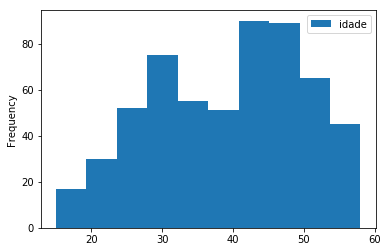

In [286]:
df = (
    pd.read_csv('../data/breast_cancer/breast_cancer_data.csv') ### lendo o dataframe
    .loc[:,['diagnosis','age','pregnancies']]
    .fillna(15)
    .dropna()
    .replace()
    .assign(nova_idade = lambda df: pd.to_datetime(df.date))       ### cirando coluna nova_idade
    .rename(columns={'age':'idade'})
    .loc[:,['idade']]
    
)

df

In [288]:
import folium as fl

In [335]:
m = fl.Map(location=[-15.8372, -47.870445],tiles='OpenStreetMap',zoom_start=10,zoom_control=False,)

In [336]:
m

In [315]:
list_de_marcadores = [[47.638013, -122.885167],[47.638013, -122.395167],[47.438013, -122.365167]]

for idx,marcador in enumerate(list_de_marcadores):
    fl.Marker(marcador).add_to(m)

In [316]:
m